In [68]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import wget
import os
from astropy.wcs import WCS
from scipy.stats import scoreatpercentile
from astropy.visualization import simple_norm
from astropy.table import Table
from reproject import reproject_interp
import matplotlib.image as mpimg

homedir = os.getenv("HOME")

In [24]:
vf=Table.read(homedir+'/v2_snrcoadd.fits')
galaxy = vf[np.where(vf['objname']=='NGC3364')[0]]

In [38]:
def pull_LS_image_fits(galaxy,pixscale):
    ra = str(galaxy['RA_1'][0])
    dec = str(galaxy['DEC_1'][0])
    galname = str(galaxy['VFID'][0])
    pixscale = str(pixscale)
    image_url = 'https://www.legacysurvey.org/viewer/cutout.fits?ra='+ra+'&dec='+dec+'&layer=ls-dr9&pixscale='+pixscale
    filename = homedir+'/Desktop/'+galname+'.fits'
    if os.path.exists(filename):
        os.remove(filename)
        image = wget.download(image_url,out=filename)
    else:
        image = wget.download(image_url,out=filename)
    return filename

In [65]:
def pull_LS_image_jpg(galaxy,w3_header,pixscale):
    
    pixscale=1
    pscale=np.abs(float(h_wise['CD1_1']))
    xsize=np.abs(int(h_wise['NAXIS1']))
    xsize_arcsec=pscale*3600*xsize
    imsize=int(xsize_arcsec/pixscale)
    imsize=str(imsize)
    
    ra = str(galaxy['RA_1'][0])
    dec = str(galaxy['DEC_1'][0])
    galname = str(galaxy['VFID'][0])
    pixscale = str(pixscale)
    image_url = 'https://www.legacysurvey.org/viewer/cutout.jpg?ra='+ra+'&dec='+dec+'&layer=ls-dr9&size='+imsize+'&pixscale='+str(1)
    filename = homedir+'/Desktop/'+galname+'.jpg'
    if os.path.exists(filename):
        os.remove(filename)
        image = wget.download(image_url,out=filename)
    else:
        image = wget.download(image_url,out=filename)
    return filename

In [35]:
#testing pixscale with NGC3364 cutout
im_path = homedir+'/Desktop/maskies_ngc3364/NGC3364-custom-image-W3.fits'
im_wise, h_wise = fits.getdata(im_path, header=True)
wcs_wise = WCS(h_wise)

In [39]:
filename=pull_LS_image(galaxy,1)

In [67]:
#pull jpg image
filename_2=pull_LS_image_jpg(galaxy,h_wise,1)

In [70]:
images=[im_wise,filename_2]
titles=['WISE Image','LS Image']

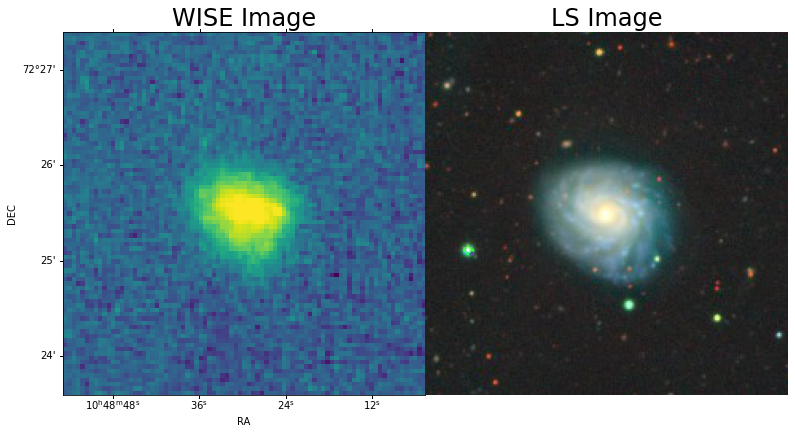

In [78]:
plt.figure(figsize=(13,7))
plt.subplots_adjust(wspace=.0)
for i,im in enumerate(images):
    plt.xlabel('RA')
    if i == 0:
        plt.subplot(1,2,i+1,projection = wcs_wise)
        norm = simple_norm(images[i],stretch='asinh',max_percent=99.5)
        plt.imshow(im,origin='lower',cmap='viridis',norm=norm)
        plt.ylabel('DEC')
        ax = plt.gca()
        ax.set_yticks([])
    if i == 1:
        plt.subplot(1,2,i+1)
        plt.imshow(mpimg.imread(images[i]),origin='lower')
        plt.gca().invert_yaxis()
        plt.axis("off")

    plt.subplots_adjust(wspace=0,hspace=0)
    plt.title(titles[i],fontsize=24)